# 머신러닝을 이용한 뉴스 카테고리 분류 예제

#### 초록
***
<span style="font-size:11pt; line-height:1.8;">
    &nbsp; &nbsp; 로이터 뉴스 데이터셋을 이용하여, (1) '고전적 머신러닝 모델과 딥러닝 모델의 성능 차이' (2) '단어사전 크기에 따른 모델의 성능 차이'를 확인 하였다. 로이터 뉴스 데이터셋은 '뉴스 본문'과 '본문에 해당하는 카테고리에 대한 값'이 한 쌍으로 학습 데이터 8,982개, 테스트 데이터 2,246개로 이루어져 있다. 데이터셋의 클래스 별 데이터 분포가 불균형 하다는 것과 데이터셋이 이미 정수로 인코딩 되어 있다는 특징이 있다. 고전적 머신러닝 모델의 입력으로 데이터셋을 TF-IDF 임베딩을 사용하고 딥러닝 모델의 입력으로는 별다른 전처리 없이 130 길이의 패딩 처리만 거친 후 데이터셋을 바로 사용하였다. 모델의 평가지표로 데이터가 클래스 별로 불균형하게 분포하기 때문에 F1-Score를 사용, 최종적으로 '단어사전 크기에 따른 모델의 성능'의 평균을 지표로 채택 하였다. 고전적 머신러닝 모델은 총 8개를 사용하였으며 딥러닝 모델로 1D Convolution 레이어를 이용한 모델을 채택하였다. 고전적 머신러닝 모델과 딥러닝 모델의 성능 차이를 확인한 결과, Voting(0.086), 로지스틱 회귀, 딥러닝, 선형 서포트 벡터 머신 등의 순으로 성능이 좋았다. 고전적 머신러닝 모델에 입력한 데이터의 경우 TF-IDF 임베딩을 사용하였지만, 딥러닝 모델에 입력한 데이터는 주어진 데이터를 별도의 전처리 없이 바로 사용하여, 딥러닝 모델의 뚜렷한 성능 향상을 도모하지 못한 것으로 판단하였다. 단어의 크기에 따른 성능 차이를 확인한 결과, 일관된 결과를 보여주지 않고 모델 별로 상이 하였다. 따라서 모델과 데이터에 따라 최적의 단어사전의 크기 설정은 상이하므로, 연구자가 이를 고려하여 다양한 시도를 할 필요가 있다.
</span>

***

<br>

## 1. 서론
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 본 예제에서는 뉴스 본문을 입력하면 그에 대한 카테고리를 분류하는 모델을 생성하고 평가하는 것을 목표로 합니다. 이를 위해, 서포트 벡터 머신, 나이브 베이즈 등의 고전적 머신러닝과 딥러닝 모델을 사용 합니다. 또한, 단어사전 크기를 '모든 단어', '10,000개 단어', '5,000개 단어'로 구분하여 모델의 성능을 확인 합니다. 평가지표를 선택하여 최종적으로 각 모델 간 성능을 비교 합니다. 다음은 예제의 진행 순서를 제시한 것입니다.
</span><br><br>


> _1. 데이터 분석_
>
> _2. 데이터 전처리_
>
> _3. 고전적 머신러닝 모델 학습 및 평가_
>
> _4. 딥러닝 모델 학습 및 평가_


***

<br>

## 2. 데이터 분석
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 데이터셋을 분석 합니다. 데이터셋은 '로이터 뉴스 데이터'로, 뉴스 본문과 46개의 뉴스 카테고리 중 본문에 해당하는 하나의 값이 한 쌍으로 이루어져 있습니다. 단어사전의 크기에 따른 모델의 성능을 비교하기 위해 '모든 단어', '10,000개 단어', '5,000개 단어'를 사용하는 데이터셋을 구분하여 사용 합니다. 뉴스 본문은 토큰화가 이미 이루어져 정수 형태로 인코딩 되어 있으며, 학습 데이터는 8,982개, 테스트 데이터는 2,246개 입니다. 하나의 문서는 최대 2,376개, 평균 145개의 토큰으로 이루어져 있습니다. 또한, 46개의 클래스 별 데이터 분포가 불균형하게 존재함을 확인하였습니다. 따라서, 추후 모델 평가 시에 이를 고려한 평가지표를 선택할 필요가 있습니다.
</span>

***

#### 필요 라이브러리 호출
***
+ 예제에 사용할 라이브러리를 호출 합니다.
***

In [1]:
import numpy as np   #행렬 연산
import pandas as pd   #데이터 프레임
import seaborn as sns   #데이터 시각화
import matplotlib.pyplot as plt   #데이터 시각화


from sklearn.metrics import f1_score #F1-score
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.model_selection import train_test_split   #학습 데이터 분할


import tensorflow as tf   #신경망
from keras import backend as K   #케라스 F1-score
from tensorflow.keras.datasets import reuters   #데이터셋
from tensorflow.keras.utils import to_categorical   #원핫 인코딩
from tensorflow.keras.preprocessing.sequence import pad_sequences   #패딩


from sklearn.feature_extraction.text import CountVectorizer   #DTM
from sklearn.feature_extraction.text import TfidfTransformer   #TF-IDF


#머신러닝 모델==========================================
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
#End====================================================

<br>

#### 데이터셋 불러오기
***
+ 예제에서 사용할 '로이터 뉴스 데이터를 불러옵니다.


+ 단어사전 크기에 따른 성능 분석을 확인하기 위해 '모든 단어', '10,000개 단어', '5,000개 단어'로 구성된 데이터셋을 각각 불러옵니다.


+ 학습 데이터는 8,982개, 테스트 데이터는 2,246개 입니다.
***

In [3]:
(x_train_all, y_train_all), (x_test_all, y_test_all) = reuters.load_data(num_words=None, test_split=0.2)
(x_train_10th, y_train_10th), (x_test_10th, y_test_10th) = reuters.load_data(num_words=10000, test_split=0.2)
(x_train_5th, y_train_5th), (x_test_5th, y_test_5th) = reuters.load_data(num_words=5000, test_split=0.2)

print("*" * 50)
print('학습 샘플의 수: {}'.format(len(x_train_all)))
print('테스트 샘플의 수: {}'.format(len(x_test_all)))
print("*" * 50)

**************************************************
학습 샘플의 수: 8982
테스트 샘플의 수: 2246
**************************************************


#### 학습 데이터 출처
***
+ Martin Thoma, The Reuters Dataset(2017), https://martin-thoma.com/nlp-reuters/
***

<br>

#### 데이터 기본 정보 확인
***
+ 입력 데이터는 이미 정수 형태로 인코딩 되어 있는 것을 확인할 수 있습니다.


+ 정답 데이터는 하나의 정수 값으로 총 클래스는 46개 입니다.
***

In [4]:
print("< TRAIN DATA >".center(60, "="))
print(np.array(x_train_all[0]))

print("\nTARGET DATA:", y_train_all[0])
print("=" * 60)

print('클래스의 수 : {}'.format(max(y_train_all) + 1))

=======================< TRAIN DATA >=======================
[    1 27595 28842     8    43    10   447     5    25   207   270     5
  3095   111    16   369   186    90    67     7    89     5    19   102
     6    19   124    15    90    67    84    22   482    26     7    48
     4    49     8   864    39   209   154     6   151     6    83    11
    15    22   155    11    15     7    48     9  4579  1005   504     6
   258     6   272    11    15    22   134    44    11    15    16     8
   197  1245    90    67    52    29   209    30    32   132     6   109
    15    17    12]

TARGET DATA: 3
클래스의 수 : 46


<br>

#### 데이터 길이 분석
***
+ 2,376개의 토큰로 이루어진 데이터가 최대 길이 이며, 평균 약 145개의 토큰으로 이루어져 있습니다.
***

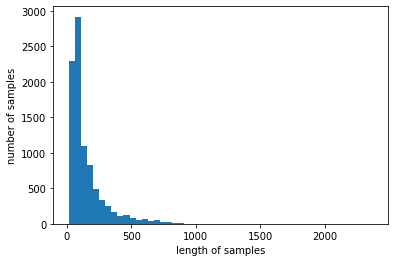

**************************************************
훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633
**************************************************


In [5]:
plt.hist([len(s) for s in x_train_all], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

print("*" * 50)
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train_all)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_all))/len(x_train_all)))
print("*" * 50)

<br>

#### 클래스별 데이터 분포 시각화
***
+ 총 46개(0 ~ 45)의 클래스에 대한 학습 데이터의 분포를 시각화 합니다.


+ 데이터 분포가 불균형 한 것을 확인할 수 있습니다.
***

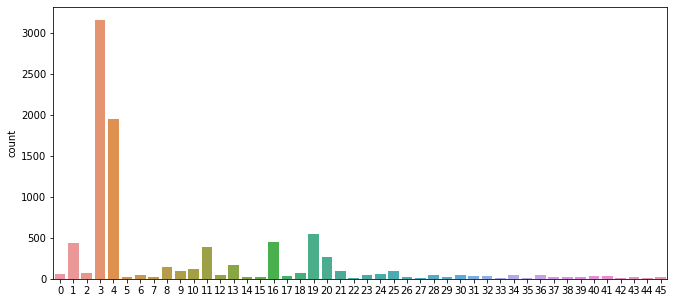

In [6]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_all)
plt.show()

<br>

#### 클래스별 데이터 분포 분석
***
+ 총 46개(0 ~ 45)의 클래스 정보와 학습 데이터의 분포를 출력 합니다.
***

In [7]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
dataset_class = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
 'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
 'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
 'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
 'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']
#https://github.com/SteffenBauer/KerasTools/tree/master/Reuters_Analysis
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

_, counts_elements = np.unique(y_train_all, return_counts=True)

print("< 각 클래스 빈도수 >".center(100, "="))
for idx, count in enumerate(counts_elements):
    topic = f"{idx}({dataset_class[idx]})".center(15)
    print(f"{topic}: {count}", end="\t")
    if (idx+1) % 5 == 0:
        print("\n")
print("\n" + "=" * 110)

===========================================< 각 클래스 빈도수 >============================================
    0(cocoa)   : 55	    1(grain)   : 432	   2(veg-oil)  : 74	    3(earn)    : 3159	     4(acq)    : 1949	

    5(wheat)   : 17	   6(copper)   : 48	   7(housing)  : 16	8(money-supply): 139	   9(coffee)   : 101	

   10(sugar)   : 124	   11(trade)   : 390	  12(reserves) : 49	    13(ship)   : 172	   14(cotton)  : 26	

  15(carcass)  : 20	   16(crude)   : 444	  17(nat-gas)  : 39	    18(cpi)    : 66	  19(money-fx) : 549	

  20(interest) : 269	    21(gnp)    : 100	 22(meal-feed) : 15	    23(alum)   : 41	  24(oilseed)  : 62	

    25(gold)   : 92	    26(tin)    : 24	27(strategic-metal): 15	 28(livestock) : 48	   29(retail)  : 19	

    30(ipi)    : 45	 31(iron-steel): 39	   32(rubber)  : 32	    33(heat)   : 11	    34(jobs)   : 50	

    35(lei)    : 10	    36(bop)    : 49	    37(zinc)   : 19	   38(orange)  : 19	  39(pet-chem) : 24	

    40(dlr)    : 36	    41(gas)    : 30	   42(silver)  : 13	    4

<br>

## 3. 데이터 전처리
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 뉴스 본문을 고전적 머신러닝 모델에 입력하기 위해, TF-IDF 형태로 변환한 합니다. TF-IDF는 단어의 빈도 뿐만아니라 문서 간 단어 사용 정도를 바탕으로 단어의 중요 정도에 대한 정보 내제하고 있는 임베딩 기법 입니다. 따라서, TF-IDF를 사용함으로써 뉴스 본문으로부터 중요 단어를 판단할 수 있고 이는 모델이 본문이 해당하는 카테고리를 판단하는 데에 중요한 변수로 작용 합니다.
</span>

***

#### 단어사전 생성하기
***
+ 단어사전을 생성하고 일부를 출력 합니다.


+ 총 30,982개의 토큰이 등록되어 있습니다.
***

In [8]:
word_index = reuters.get_word_index(path="reuters_word_index.json")   #단어장

index_to_word = { index+3 : word for word, index in word_index.items()}
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
    
#출력부==================================
print("< vocab >".center(20, "="))
for idx, (key, value) in enumerate(index_to_word.items()):
    print(f"{key}: {value}")
    if idx == 10: break;
print(".\n" * 3)
print("(skip)")
print("=" * 20)

print("vocab size:", len(index_to_word))
#End=====================================

=====< vocab >======
10999: mdbl
16263: fawc
12092: degussa
8806: woods
13799: hanging
20675: localized
20676: sation
20678: chanthaburi
11000: refunding
8807: hermann
20679: passsengers
.
.
.

(skip)
vocab size: 30982


<br>

#### 단어 크기에 따른 디코더 결과 출력
***
+ 앞서 생성한 단어 크기별 데이터셋에 따른 디코더 결과를 확인 합니다.


+ `<unk>` 토큰을 식별하기 위해 `★`을 함께 출력 합니다.


+ 모든 단어를 이용하는 데이터셋의 경우 `<unk>` 토큰이 존재하지 않지만, 10,000개, 5,000개의 단어만을 이용하는 데이터셋의 경우 `<unk>` 토큰을 확인할 수 있습니다.
***

In [9]:
def decode_sentence(data):
    sentence = []
    for index in data:
        if index == 2:
            sentence.append("★<UNK>★")
            continue
        sentence.append(index_to_word[index])
    return " ".join(sentence)


print("< ALL Vocab >".center(80, "="))
print(decode_sentence(x_train_all[2021]))
print("=" * 80, end="\n\n")

print("< 10,000 Vocab >".center(80, "="))
print(decode_sentence(x_train_10th[2021]))
print("=" * 80, end="\n\n")

print("< 5,000 Vocab >".center(80, "="))
print(decode_sentence(x_train_5th[2021]))
print("=" * 80, end="\n\n")

=================================< ALL Vocab >==================================
<sos> the yield on 180 day bankers security deposit accounts issued this week by the saudi arabian monetary agency sama rose slightly to 6 63492 pct from 6 56823 last week bankers said sama reduced the offer price on the 500 mln riyal issue to 96 78906 from 96 82031 last week like dated interbank deposits were quoted today at seven 6 3 4 pct sama offers a total 1 9 billion riyals in 30 91 and 180 day paper to banks in bahrain each week reuter 3

================================< 10,000 Vocab >================================
<sos> the yield on 180 day bankers security deposit accounts issued this week by the saudi arabian monetary agency sama rose slightly to 6 ★<UNK>★ pct from 6 ★<UNK>★ last week bankers said sama reduced the offer price on the 500 mln riyal issue to 96 ★<UNK>★ from 96 ★<UNK>★ last week like dated interbank deposits were quoted today at seven 6 3 4 pct sama offers a total 1 9 billion riya

<br>

#### 데이터 디코딩
***
+ 정수로 이루어진 데이터를 문자로 디코딩 합니다.
***

In [10]:
def int_to_str(data):
    decoded = []
    for i in range(len(data)):
        t = ' '.join([index_to_word[index] for index in data[i]])
        decoded.append(t)
    return decoded


x_train_str_all, x_test_str_all = int_to_str(x_train_all), int_to_str(x_test_all)
x_train_str_10th, x_test_str_10th = int_to_str(x_train_10th), int_to_str(x_test_10th)
x_train_str_5th, x_test_str_5th = int_to_str(x_train_5th), int_to_str(x_test_5th)

<br>

#### TF-IDF 획득
***
+ 문자로 변환된 데이터를 바탕으로 TF-IDF를 획득 합니다.
***

In [11]:
dtmvector = CountVectorizer()
tfidf_transformer = TfidfTransformer()

def get_TF_IDF(train, test):
    x_train_dtm = dtmvector.fit_transform(train)   #DTM
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)   #TF-IDF
    
    x_test_dtm = dtmvector.transform(test) #테스트 데이터를 DTM으로 변환
    tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

    return (tfidfv, tfidfv_test)


tfidfv_train_all, tfidfv_test_all = get_TF_IDF(x_train_str_all, x_test_str_all)
tfidfv_train_10th, tfidfv_test_10th = get_TF_IDF(x_train_str_10th, x_test_str_10th)
tfidfv_train_5th, tfidfv_test_5th = get_TF_IDF(x_train_str_5th, x_test_str_5th)

<br>

## 4. 머신러닝 모델 학습 및 평가
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 앞서 생성한 TF-IDF 임베딩을 사용하여 고전 머신러닝 모델을 학습하고 평가합니다. 카테고리 별 데이터 분포가 불균형한 것을 근거로 모델의 평가지표로 F1-Score를 사용 합니다. F1-Score Weighted와 Micro는 클래스 별 존재하는 불균형을 고려한 평균으로 예제에서는 모델의 성능을 평가하기 위해 Weighted를 평가지표로 사용 합니다. 또한, 단어 크기 별 모델의 F1-Score의 평균을 최종 성능으로 판단 합니다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 머신러닝 모델은 총 8개로 '나이브 베이즈', '컴플리먼트 나이브 베이즈', '로지스틱 회귀', '선형 서포트 벡터 머신', '결정 트리', '랜덤 포레스트', '그래디언트 부스팅 트리', '보팅'을 사용합니다. [표 1]은 고전적 머신러닝 모델의 성능과 순위를 제시한 것입니다.
</span><br><br>


|Rank|Model|(all / 10,000 / 5,000) F1-Score(weight)|F1-Score(weight) Avg|
|:--------:|:--------:|:--------:|:--------:|
|1|**Voting(Logistic Regression + CNB)**|0.81 / 0.805 / 0.803|0.806|
|2|**Logistic Regression**|0.812 / 0.806 / 0.798|0.805|
|3|**Linear Support Vector Machine**|0.781 / 0.781 / 0.774|0.779|
|4|**GBC**|0.748 / 0.743 / 0.749|0.747|
|5|**CNB**|0.735 / 0.746 / 0.746|0.742|
|6|**Random Forest**|0.623 / 0.643 / 0.677|0.648|
|7|**Decision Tree**|0.577 / 0.578 / 0.573|0.576|
|8|**Naive Bayes**|0.505 / 0.576 / 0.601|0.561|

[표 1] 고전적 머신러닝 모델 성능

***

#### 모델 생성 및 학습, 모델 성능 출력 함수 생성
***
+ `test_model` 함수를 통해 모델을 생성 및 학습 합니다.


+ `print_model_result` 함수를 통해 모델 성능(`Accuracy`, `F1-Score`)을 출력 합니다.
***

In [12]:
def test_model(model, train_x, train_y, test_x, test_y):
    model.fit(train_x, train_y)
    predict = model.predict(test_x)
    
    accuracy = accuracy_score(test_y, predict)
    f1_weight = f1_score(test_y, predict, average="weighted")
    f1_micro = f1_score(test_y, predict, average="micro")
    return (accuracy, f1_weight, f1_micro)


def print_model_result(acc, f1_w, f1_m, title):
    print(f"< {title} >".center(30, "*"))
    print("Accuracy:", round(acc, 3))
    print("F1-Score(Weight):", round(f1_w, 3))
    print("F1-Score(Micro):", round(f1_m, 3))
    print("*" * 30, end="\n\n")

<br>

#### 나이브 베이즈(Naive Bayes)
***
+ 나이브 베이즈는 연산 효율이 좋아 큰 데이터를 처리하는 데에 있어 유용 하며, 연속 데이터에 비해 이산 데이터에서 성능이 좋습니다.


+ `F1-Score`를 기준으로 '5,000개의 단어 사용(0.601)', '10,000개의 단어 사용(0.576)', '모든 단어 사용(0.505)' 순으로 성능이 좋은 것을 확인 하였습니다.
***

##### 정성적 성능 해석

+ _나이브 베이즈는 '이산 데이터'에 대해 성능이 좋지만, 해당 데이터는 TF-IDF의 임베딩 벡터로 연속 데이터이므로 그다지 좋지 않은 성능을 보이는 것 같습니다._


+ _LMS 본문에서는 '나이브 베이즈'가 조건부 독립을 전제로 연산하기 때문에 샘플이 특정 클래스에 치우칠 경우, 모델의 출력도 이에 따라 편향 된다고 하였습니다._

In [13]:
acc, f1_w, f1_m = test_model(MultinomialNB(), tfidfv_train_all, y_train_all, tfidfv_test_all, y_test_all)
print_model_result(acc, f1_w, f1_m, "All Vocab")


acc, f1_w, f1_m = test_model(MultinomialNB(), tfidfv_train_10th, y_train_10th, tfidfv_test_10th, y_test_10th)
print_model_result(acc, f1_w, f1_m, "10,000 Vocab")


acc, f1_w, f1_m = test_model(MultinomialNB(), tfidfv_train_5th, y_train_5th, tfidfv_test_5th, y_test_5th)
print_model_result(acc, f1_w, f1_m, "5,000 Vocab")

********< All Vocab >*********
Accuracy: 0.6
F1-Score(Weight): 0.505
F1-Score(Micro): 0.6
******************************

*******< 10,000 Vocab >*******
Accuracy: 0.657
F1-Score(Weight): 0.576
F1-Score(Micro): 0.657
******************************

*******< 5,000 Vocab >********
Accuracy: 0.673
F1-Score(Weight): 0.601
F1-Score(Micro): 0.673
******************************



<br>

#### Complement Naive Bayes(CNB)
***
+ CNB는 나이브 베이즈의 불균형한 데이터에서 발생하는 편향 문제를 해결하기 위해 제시되어 불균형에 따라 가중치를 적용하여 문제를 해결하는 모델 입니다.


+ `F1-Score`를 기준으로 '5,000개의 단어 사용(0.746)'와 '10,000개의 단어 사용(0.746)'의 경우 성능이 동일하며, '모든 단어 사용(0.735)' 순으로 성능이 좋은 것을 확인 하였습니다.
***

##### 정성적 성능 해석
+ _기존 나이브 베이즈 모델의 성능 보다 향상된 것을 확인할 수 있으며, 이는 CNB가 불균형한 데이터에 강건함을 잘 보여 줍니다._

In [14]:
cc, f1_w, f1_m = test_model(ComplementNB(), tfidfv_train_all, y_train_all, tfidfv_test_all, y_test_all)
print_model_result(acc, f1_w, f1_m, "All Vocab")

acc, f1_w, f1_m = test_model(ComplementNB(), tfidfv_train_10th, y_train_10th, tfidfv_test_10th, y_test_10th)
print_model_result(acc, f1_w, f1_m, "10,000 Vocab")

acc, f1_w, f1_m = test_model(ComplementNB(), tfidfv_train_5th, y_train_5th, tfidfv_test_5th, y_test_5th)
print_model_result(acc, f1_w, f1_m, "5,000 Vocab")

********< All Vocab >*********
Accuracy: 0.673
F1-Score(Weight): 0.735
F1-Score(Micro): 0.765
******************************

*******< 10,000 Vocab >*******
Accuracy: 0.771
F1-Score(Weight): 0.746
F1-Score(Micro): 0.771
******************************

*******< 5,000 Vocab >********
Accuracy: 0.771
F1-Score(Weight): 0.746
F1-Score(Micro): 0.771
******************************



<br>

#### 로지스틱 회귀(Logistic Regression)
***
+ 로지스틱 회귀는 '선형 분류 모델'의 하나로 데이터 간의 관계를 토대로 분류 또는 확률을 계산하는 모델 입니다.


+ `F1-Score`를 기준으로 '모든 단어 사용(0.812)', '10,000개의 단어 사용(0.806)', '5,000개의 단어 사용(0.798)' 순으로 성능이 좋은 것을 확인 하였습니다.
***

##### 정성적 성능 해석
+ _기존 나이브 베이즈 모델의 성능 보다 향상된 것을 확인할 수 있으며, 이는 CNB가 불균형한 데이터에 강건함을 잘 보여 줍니다._

In [15]:
def get_model():
    return LogisticRegression(C=10000, penalty='l2', max_iter=5000)

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_all, y_train_all, tfidfv_test_all, y_test_all)
print_model_result(acc, f1_w, f1_m, "All Vocab")

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_10th, y_train_10th, tfidfv_test_10th, y_test_10th)
print_model_result(acc, f1_w, f1_m, "10,000 Vocab")

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_5th, y_train_5th, tfidfv_test_5th, y_test_5th)
print_model_result(acc, f1_w, f1_m, "5,000 Vocab")

********< All Vocab >*********
Accuracy: 0.817
F1-Score(Weight): 0.812
F1-Score(Micro): 0.817
******************************

*******< 10,000 Vocab >*******
Accuracy: 0.811
F1-Score(Weight): 0.806
F1-Score(Micro): 0.811
******************************

*******< 5,000 Vocab >********
Accuracy: 0.803
F1-Score(Weight): 0.798
F1-Score(Micro): 0.803
******************************



<br>

#### 선형 서포트 벡터 머신(Linear Support Vector Machine)
***
+ 선형 서포트 벡터 머신은 초평면 상태에서 경게를 나누어 분류하는 모델 입니다.


+ `F1-Score`를 기준으로 '10,000개의 단어 사용(Micro: 0.786)', '모든 단어 사용(Micro: 0.785)', '5,000개 단어 사용(0.774)' 순으로 성능이 좋은 것을 확인 하였습니다.
***

##### 정성적 성능 해석
+ _SVM은 한 쪽으로 치우치지 않고 균등하게 분류 하고자 하는 특성이 있기 때문에, 나름 준수한 성능을 제시해 주는 것으로 보입니다._

In [17]:
def get_model():
    return LinearSVC(C=1000, penalty='l1', max_iter=5000, dual=False)

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_all, y_train_all, tfidfv_test_all, y_test_all)
print_model_result(acc, f1_w, f1_m, "All Vocab")

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_10th, y_train_10th, tfidfv_test_10th, y_test_10th)
print_model_result(acc, f1_w, f1_m, "10,000 Vocab")

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_5th, y_train_5th, tfidfv_test_5th, y_test_5th)
print_model_result(acc, f1_w, f1_m, "5,000 Vocab")

********< All Vocab >*********
Accuracy: 0.785
F1-Score(Weight): 0.781
F1-Score(Micro): 0.785
******************************

*******< 10,000 Vocab >*******
Accuracy: 0.786
F1-Score(Weight): 0.781
F1-Score(Micro): 0.786
******************************

*******< 5,000 Vocab >********
Accuracy: 0.776
F1-Score(Weight): 0.774
F1-Score(Micro): 0.776
******************************



<br>

#### 결정 트리(Decision Tree)
***
+ 결정 트리는 기준에 따라 분기와 노드를 생성함으로써 데이터를 분류하는 모델 입니다.


+ `F1-Score`를 기준으로 '10,000개의 단어 사용(0.578)', '모든 단어 사용(0.577)', '5,000개 단어 사용(0.573)' 순으로 성능이 좋은 것을 확인 하였습니다.
***

##### 정성적 성능 해석
+ _머신러닝 모델 중 가장 저조한 성능을 보여주었는데, 결정 트리의 단점 중 하나인 과적합 문제로 인해 불균형한 데이터를 올바르게 학습하지 못한 것으로 예상 됩니다._

In [18]:
def get_model():
    return DecisionTreeClassifier(max_depth=10, random_state=0)

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_all, y_train_all, tfidfv_test_all, y_test_all)
print_model_result(acc, f1_w, f1_m, "All Vocab")

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_10th, y_train_10th, tfidfv_test_10th, y_test_10th)
print_model_result(acc, f1_w, f1_m, "10,000 Vocab")

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_5th, y_train_5th, tfidfv_test_5th, y_test_5th)
print_model_result(acc, f1_w, f1_m, "5,000 Vocab")

********< All Vocab >*********
Accuracy: 0.621
F1-Score(Weight): 0.577
F1-Score(Micro): 0.621
******************************

*******< 10,000 Vocab >*******
Accuracy: 0.62
F1-Score(Weight): 0.578
F1-Score(Micro): 0.62
******************************

*******< 5,000 Vocab >********
Accuracy: 0.618
F1-Score(Weight): 0.573
F1-Score(Micro): 0.618
******************************



<br>

#### 랜덤 포레스트(Random Forest)
***
+ 랜덤 포레스트는 결정 트리의 과적합 문제를 해결하고자 '랜덤 노드 최적화'와 '앙상블' 기법을 이용하였습니다.


+ `F1-Score`를 기준으로 '5,000개의 단어 사용(0.677)', '10,000개의 단어 사용(0.643)', '모든 단어 사용(0.623)' 순으로 성능이 좋은 것을 확인 하였습니다.
***

##### 정성적 성능 해석
+ _앞서 랜덤 포레스트는 결정 트리의 과적합 문제를 해결하기 위해 제시된 것이라 하였는데, 실제 결정 트리 모델의 성능 보다 향상 된 것을 확인할 수 있습니다._

In [19]:
def get_model():
    return RandomForestClassifier(n_estimators=5, random_state=0)

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_all, y_train_all, tfidfv_test_all, y_test_all)
print_model_result(acc, f1_w, f1_m, "All Vocab")

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_10th, y_train_10th, tfidfv_test_10th, y_test_10th)
print_model_result(acc, f1_w, f1_m, "10,000 Vocab")

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_5th, y_train_5th, tfidfv_test_5th, y_test_5th)
print_model_result(acc, f1_w, f1_m, "5,000 Vocab")

********< All Vocab >*********
Accuracy: 0.654
F1-Score(Weight): 0.623
F1-Score(Micro): 0.654
******************************

*******< 10,000 Vocab >*******
Accuracy: 0.674
F1-Score(Weight): 0.643
F1-Score(Micro): 0.674
******************************

*******< 5,000 Vocab >********
Accuracy: 0.701
F1-Score(Weight): 0.677
F1-Score(Micro): 0.701
******************************



<br>

#### 그래디언트 부스팅 트리(Gradient Boosting Classifier)
***
+ 그래디언트 부스팅 트리는 여러 개의 결정 트리를 이용하여 앙상블 기법을 사용하는 모델 입니다.


+ `F1-Score`를 기준으로 '5,000개의 단어 사용(0.749)', '모든 단어 사용(0.748)', '10,000개의 단어 사용(0.743)' 순으로 성능이 좋은 것을 확인 하였습니다.
***

##### 정성적 성능 해석
+ _LMS 본문에서는 그래디언트 부스팅 트리가 '랜덤 포레스트와 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성한다'고 하였는데, 이러한 점으로 인해 랜덤 포르스트 보다 성능이 좋은 것이라 생각되어 집니다._

In [20]:
def get_model():
    return GradientBoostingClassifier(random_state=0, learning_rate=0.01)

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_all, y_train_all, tfidfv_test_all, y_test_all)
print_model_result(acc, f1_w, f1_m, "All Vocab")

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_10th, y_train_10th, tfidfv_test_10th, y_test_10th)
print_model_result(acc, f1_w, f1_m, "10,000 Vocab")

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_5th, y_train_5th, tfidfv_test_5th, y_test_5th)
print_model_result(acc, f1_w, f1_m, "5,000 Vocab")

********< All Vocab >*********
Accuracy: 0.762
F1-Score(Weight): 0.748
F1-Score(Micro): 0.762
******************************

*******< 10,000 Vocab >*******
Accuracy: 0.757
F1-Score(Weight): 0.743
F1-Score(Micro): 0.757
******************************

*******< 5,000 Vocab >********
Accuracy: 0.762
F1-Score(Weight): 0.749
F1-Score(Micro): 0.762
******************************



<br>

#### 보팅(Voting)
***
+ 보팅은 여러 모델을 앙상블 기법으로 사용하는 모델로, 예제에서는 '로지스틱 회귀'와 'CNB'를 이용 합니다.


+ `F1-Score`를 기준으로 '모든 단어 사용(0.810)', '10,000개의 단어 사용(0.0.805)', '5,000개의 단어 사용(0.803)' 순으로 성능이 좋은 것을 확인 하였습니다.
***

##### 정성적 성능 해석
+ _로지스틱 회귀와 성능이 비슷하지만, 5,000개의 단어만을 이용하였을 때, 기존 로지스틱 회귀의 성능 F1-Score(Weight)가 0.798에서 0.803으로 향상된 것을 바탕으로 좀 더 강건한 모델이라 생각되어 집니다._

In [21]:
def get_model():
    voting_classifier = VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(C=10000, penalty='l2')),
            ('cb', ComplementNB())
        ], voting='soft', n_jobs=-1
    )
    return voting_classifier


cc, f1_w, f1_m = test_model(get_model(), tfidfv_train_all, y_train_all, tfidfv_test_all, y_test_all)
print_model_result(acc, f1_w, f1_m, "All Vocab")

acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_10th, y_train_10th, tfidfv_test_10th, y_test_10th)
print_model_result(acc, f1_w, f1_m, "10,000 Vocab")


acc, f1_w, f1_m = test_model(get_model(), tfidfv_train_5th, y_train_5th, tfidfv_test_5th, y_test_5th)
print_model_result(acc, f1_w, f1_m, "5,000 Vocab")

********< All Vocab >*********
Accuracy: 0.762
F1-Score(Weight): 0.81
F1-Score(Micro): 0.816
******************************

*******< 10,000 Vocab >*******
Accuracy: 0.811
F1-Score(Weight): 0.805
F1-Score(Micro): 0.811
******************************

*******< 5,000 Vocab >********
Accuracy: 0.809
F1-Score(Weight): 0.803
F1-Score(Micro): 0.809
******************************



<br>

## 5. 딥러닝 모델 학습 및 평가
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 1D Convolution 레이어를 사용한 딥러닝 모델을 사용 합니다. 동일한 로이터 뉴스 데이터셋을 이용하며, 단어 크기에 따른 성능을 확인 합니다. 모델의 학습 횟수 는 15회, 옵티마이저는 'Adam'으로 설정하여 학습 하였습니다. 그 결과, 모든 단어를 사용하여 모델을 학습 하였을 때, 테스트 데이터에 대한 최종 F1-Score는 0.781 이고 10,000개 단어를 사용하여 모델을 학습 하였을 때, 테스트 데이터에 대한 최종 F1-Score는 0.777, 5,000개 단어를 사용하여 모델을 학습 하였을 때, 테스트 데이터에 대한 최종 F1-Score는 0.783 입니다. [표 2]는 DNN 모델의 성능 평가 결과를 제시한 것입니다.
</span><br><br>

|Model|(all / 10,000 / 5,000) F1-Score(weight)|F1-Score(weight) Avg|
|:--------:|:--------:|:--------:|
|**DNN(1D Convolution)**|0.781 / 0.777 / 0.783|0.780|

[표 2] DNN 모델 성능 평가 결과

***

<br>

#### 데이터 전처리
***
+ 데이터 전처리(패딩 처리, 원-핫 인코딩, 검증 데이터 분할) 함수를 생성 합니다.


+ '모든 단어', '10,000개 단어', '5,000개 단어' 데이터셋의 전처리를 수행 합니다.
***

In [12]:
#데이터 전처리 함수=================================
def get_dnn_data(x_train, y_train, x_test, y_test):
    max_len=300

    _x_train = pad_sequences(x_train, maxlen=max_len, padding="pre")
    _x_test = pad_sequences(x_test, maxlen=max_len, padding="pre")

    _y_train = to_categorical(y_train)
    _y_test = to_categorical(y_test)

    partial_x_train, x_val, partial_y_train, y_val = train_test_split(_x_train, _y_train, test_size=0.2, random_state=2021)
    return (partial_x_train, partial_y_train, x_val, y_val, _x_test, _y_test)
#End================================================


dnn_data_all = get_dnn_data(
    x_train_all, y_train_all, x_test_all, y_test_all
)

dnn_data_10th = get_dnn_data(
    x_train_10th, y_train_10th, x_test_10th, y_test_10th
)

dnn_data_5th = get_dnn_data(
    x_train_5th, y_train_5th, x_test_5th, y_test_5th
)

<br>

#### 모델 생성 함수
***
+ 1D Convolution 레이어를 사용하는 모델을 생성 하고 옵티마이저는 'Adam'을 사용 합니다.
***

In [13]:
#모델 생성 함수====================================
def get_dnn(vocab_size):
    word_vector_dim = 128

    model_1d = tf.keras.Sequential()
    model_1d.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
    model_1d.add(tf.keras.layers.Conv1D(256, 32, activation='relu'))
    model_1d.add(tf.keras.layers.MaxPooling1D(4))
    model_1d.add(tf.keras.layers.Dropout(0.3))

    model_1d.add(tf.keras.layers.Conv1D(256, 32, activation='relu'))
    model_1d.add(tf.keras.layers.GlobalMaxPooling1D())
    model_1d.add(tf.keras.layers.Dropout(0.3))

    model_1d.add(tf.keras.layers.Dense(46, activation='softmax'))
    
    model_1d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_m])
    return model_1d
#End================================================

<br>

#### 모델 학습 함수 생성
***
+ 모델을 학습하고 F1-Score를 출력하는 함수를 생성 합니다.


+ 학습 횟수는 15회, 배치 사이즈는 64로 설정 합니다.
***

In [14]:
#F1-Score 계산 함수=================================
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
#End================================================


#모델 학습 함수====================================
def train_model(model, data):
    x_train, y_train, x_val, y_val = data[0], data[1], data[2], data[3]
    x_test, y_test = data[4], data[5]
    
    history = model.fit(
        x_train, y_train,
        epochs=15, batch_size=64, verbose=1,
        validation_data=(x_val, y_val)
    )
    
    test_data = model.evaluate(x_test, y_test)

    print("< Test Performance >".center(40, "="))
    print("Loss:", round(test_data[0], 3))
    print("Accuracy:", round(test_data[1], 3))
    print("F1-Score:", round(test_data[2], 3))
    print("=" * 40)
    return history
#End================================================

<br>

#### 모든 단어를 사용한 DNN 모델 학습 및 평가
***
+ 검증 데이터에 대한 최종 F1-score는 0.781, 테스트 데이터에 대한 최종 F1_score는 0.781 입니다.
***

In [15]:
model = get_dnn(30982)
train_model(model, dnn_data_all)

Epoch 1/15
113/113 [==============================] - 17s 115ms/step - loss: 2.3291 - accuracy: 0.4243 - f1_m: 0.3614 - val_loss: 1.5181 - val_accuracy: 0.6227 - val_f1_m: 0.6685
Epoch 2/15
113/113 [==============================] - 9s 80ms/step - loss: 1.3089 - accuracy: 0.6652 - f1_m: 0.7130 - val_loss: 1.2103 - val_accuracy: 0.7106 - val_f1_m: 0.7420
Epoch 3/15
113/113 [==============================] - 9s 80ms/step - loss: 0.8770 - accuracy: 0.7752 - f1_m: 0.8205 - val_loss: 1.1561 - val_accuracy: 0.7474 - val_f1_m: 0.7469
Epoch 4/15
113/113 [==============================] - 9s 79ms/step - loss: 0.6430 - accuracy: 0.8302 - f1_m: 0.8568 - val_loss: 1.1720 - val_accuracy: 0.7613 - val_f1_m: 0.7669
Epoch 5/15
113/113 [==============================] - 9s 79ms/step - loss: 0.4736 - accuracy: 0.8730 - f1_m: 0.8896 - val_loss: 1.2663 - val_accuracy: 0.7685 - val_f1_m: 0.7690
Epoch 6/15
113/113 [==============================] - 9s 79ms/step - loss: 0.3584 - accuracy: 0.9028 - f1_m: 0.91

<br>

#### 10,000개 단어를 사용한 DNN 모델 학습 및 평가
***
+ 검증 데이터에 대한 최종 F1-score는 0.777, 테스트 데이터에 대한 최종 F1_score는 0.777 입니다.
***

In [16]:
model = get_dnn(10000)
train_model(model, dnn_data_10th)

Epoch 1/15
113/113 [==============================] - 9s 71ms/step - loss: 2.3047 - accuracy: 0.4053 - f1_m: 0.3671 - val_loss: 1.4957 - val_accuracy: 0.6322 - val_f1_m: 0.6614
Epoch 2/15
113/113 [==============================] - 8s 69ms/step - loss: 1.3451 - accuracy: 0.6651 - f1_m: 0.7113 - val_loss: 1.2765 - val_accuracy: 0.6939 - val_f1_m: 0.7400
Epoch 3/15
113/113 [==============================] - 8s 69ms/step - loss: 0.9958 - accuracy: 0.7391 - f1_m: 0.7923 - val_loss: 1.1809 - val_accuracy: 0.7340 - val_f1_m: 0.7517
Epoch 4/15
113/113 [==============================] - 8s 69ms/step - loss: 0.7000 - accuracy: 0.8173 - f1_m: 0.8478 - val_loss: 1.2394 - val_accuracy: 0.7529 - val_f1_m: 0.7587
Epoch 5/15
113/113 [==============================] - 8s 69ms/step - loss: 0.5451 - accuracy: 0.8515 - f1_m: 0.8705 - val_loss: 1.2477 - val_accuracy: 0.7641 - val_f1_m: 0.7694
Epoch 6/15
113/113 [==============================] - 8s 69ms/step - loss: 0.4099 - accuracy: 0.8810 - f1_m: 0.8923

<br>

#### 5,000개 단어를 사용한 DNN 모델 학습 및 평가
***
+ 검증 데이터에 대한 최종 F1-score는 0.783, 테스트 데이터에 대한 최종 F1_score는 0.783 입니다.
***

In [17]:
model = get_dnn(5000)
train_model(model, dnn_data_5th)

Epoch 1/15
113/113 [==============================] - 9s 69ms/step - loss: 2.3066 - accuracy: 0.4312 - f1_m: 0.3525 - val_loss: 1.4971 - val_accuracy: 0.6199 - val_f1_m: 0.6661
Epoch 2/15
113/113 [==============================] - 8s 67ms/step - loss: 1.3871 - accuracy: 0.6464 - f1_m: 0.6990 - val_loss: 1.2120 - val_accuracy: 0.7051 - val_f1_m: 0.7362
Epoch 3/15
113/113 [==============================] - 8s 66ms/step - loss: 1.0054 - accuracy: 0.7460 - f1_m: 0.7933 - val_loss: 1.1392 - val_accuracy: 0.7368 - val_f1_m: 0.7511
Epoch 4/15
113/113 [==============================] - 8s 67ms/step - loss: 0.7313 - accuracy: 0.8086 - f1_m: 0.8372 - val_loss: 1.1387 - val_accuracy: 0.7618 - val_f1_m: 0.7600
Epoch 5/15
113/113 [==============================] - 8s 67ms/step - loss: 0.5581 - accuracy: 0.8523 - f1_m: 0.8701 - val_loss: 1.1376 - val_accuracy: 0.7590 - val_f1_m: 0.7719
Epoch 6/15
113/113 [==============================] - 8s 67ms/step - loss: 0.3937 - accuracy: 0.8905 - f1_m: 0.9035

<br>

## 6. 결론
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 본 예제에서는 고전적 머신러닝 모델과 딥러닝 모델의 성능 차이 그리고 단어사전 크기에 따른 모델의 성능 차이를 분석하기 위해, 로이터 뉴스 데이터셋을 이용하였습니다. 로이터 뉴스 데이터셋은 뉴스 본문과 본문에 해당하는 카테고리 값이 한 쌍으로 이루어졌으며, 특징으로는 카테고리 별 데이터 분포가 불균형 하다는 점 입니다. 따라서, 데이터의 불균형을 고려한 F1-Score를 평가지표로 사용 하였습니다. 최종적으로 데이터 크기에 따른 모델의 F1-Score의 평균을 모델의 성능 지표로 채택 하였습니다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 고전적 머신러닝 모델은 총 8개를 사용하였으며 딥러닝 모델로 1D Convolution 레이어를 이용한 모델을 채택하였습니다. 고전적 머신러닝 모델과 딥러닝 모델의 성능 차이를 확인한 결과, Voting(0.086), 로지스틱 회귀, 딥러닝, 선형 서포트 벡터 머신 등의 순으로 성능이 좋았습니다. 고전적 머신러닝 모델에 입력한 데이터의 경우 TF-IDF 임베딩을 사용하였지만, 딥러닝 모델에 입력한 데이터는 주어진 데이터를 별도의 전처리 없이 바로 사용 하였습니다. 이러한 점으로 인해 뚜렷한 성능의 향상을 도모하지 못한 것으로 짐작할 수 있습니다. [표 2]는 고전적 머신러닝과 딥러닝 모델의 성능을 제시한 것입니다.
</span><br><br>
    
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 단어의 크기에 따른 성능 차이를 확인한 결과, 일관된 결과를 보여주지 않고 모델 별로 상이 하였습니다. 가령, Voting, 로지스틱 회귀 등의 모델의 경우 '모든 단어', '10,000개 단어', '5,000개 단어' 순으로 성능이 좋았지만, 딥러닝 모델, 랜덤 포레스트, 나이브 베이즈 등의 모델의 경우에는 '5,000개 단어', '10,000개 단어', '모든 단어' 순으로 좋았으며, '10,000개 단어'를 사용하였을 때 성능이 가장 준수한 모델도 존재하였습니다. 따라서, 모델을 학습 할 때, 단어의 크기는 '반드시 커야 한다' 혹은 '작아야 한다'와 같은 정답은 없으므로, 시행착오에 따른 설정이 필요할 것으로 예상 됩니다.
</span><br><br>


|Rank|Model|(all / 10,000 / 5,000) F1-Score(weight)|F1-Score(weight) Avg|
|:--------:|:--------:|:--------:|:--------:|
|1|**Voting(Logistic Regression + CNB)**|0.810 / 0.805 / 0.803|0.806|
|2|**Logistic Regression**|0.812 / 0.806 / 0.798|0.805|
|3|**DNN(1D Convolution)**|0.781 / 0.777 / 0.783|0.780|
|4|**Linear Support Vector Machine**|0.781 / 0.781 / 0.774|0.779|
|5|**GBC**|0.748 / 0.743 / 0.749|0.747|
|6|**CNB**|0.735 / 0.746 / 0.746|0.742|
|7|**Random Forest**|0.623 / 0.643 / 0.677|0.648|
|8|**Decision Tree**|0.577 / 0.578 / 0.573|0.576|
|9|**Naive Bayes**|0.505 / 0.576 / 0.601|0.561|

[표 3] 고전적 머신러닝 모델과 딥러닝 모델 성능

***

#### 형상관리 기록
***
+ v1_1: 실습 예제 진행


+ v2_1: 제출 예제 진행
***